
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;"> Timothy Lai (ttl353) and Meyappan Subbaiah (ms47296)
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer

The two data science systems we decided to focus on were #6 Fraud Detection and #15 Sales Forecasting.

Fraud detection is considered a classification problem. Companies have to sift through data such as typical customer purchasing preferences and history, where purchases are being shipped, and other similar information while ensuring that the customer is not adversely affected by any fake purchases. Decision trees, as suggested by the article, would be an example of how machine learning is applied to these kinds of problems. With an effective decision tree model, companies will be able to systematically deduce if a purchase in question falls under the fraud category. Again, these trees can be built on past incidents of fraud, and also incidents that flagged the fraud department but ended up being good purchases. If machine learning is used to earlier identify fraud detection, companies would be able to protect their customers further, while saving themselves money as well by not losing inventory or having security gaps come through their systems.

Sales forecasting, on the other hand, could be considered a clustering problem. Companies can take data from past sales in order to bucket different types of customers into different clusters. Additionally, companies could gather data on sales expectations and compare them to actual sales to determine the success of particular goods and services. From a machine learning perspective, feature selection would be involved. Clusters could be formed using methods such as Principal Components Analysis or K-means clustering. This would not only help with forecasting sales for each cluster, but companies could also use this information to effectively market goods and services to specific groups to further stimulate sales.




# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

In order to find the MLE estimate for $\theta$, we must first apply the likelihood function and then take the log of both sides. Lastly we take a partial derivative with respect to $\theta$ and solve for it based on the recoreded observations.

### Apply Likelihood Equation

$$ L(t) = \prod_{i=1}^{N} p(t)$$ 
$$ = \prod_{i=1}^{N} \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
$$ = \dfrac{\prod_{i=1}^{N} t^4}{C^n\theta^{5n}} * exp^{\dfrac{\sum_{i=1}^{N} t}{-\theta}}$$

### Take the log of both sides. 

$$ ln(L(t)) =  ln(\dfrac{\sum_{i=1}^{N} t^4}{C^n\theta^{5n}})  - {\dfrac{\sum_{i=1}^{N} t}{-\theta}}   $$ 
$$ = ln(\sum_{i=1}^{N} t^4) - ln(C^n\theta^{5n}) - {\dfrac{\sum_{i=1}^{N} t}{-\theta}} $$
$$ = ln(\sum_{i=1}^{N} t^4) - ln(C^n) - ln(\theta^{5n}) - {\dfrac{\sum_{i=1}^{N} t}{-\theta}}$$
$$ = 4 * ln(\sum_{i=1}^{N} t) - ln(C^n) - 5n * ln(\theta) - {\dfrac{\sum_{i=1}^{N} t}{-\theta}}$$

### Take the partial derivative with respect to $\theta$

$$ 0 = \dfrac{-5n}{\theta} + \dfrac{\sum_{i=1}^{N} t}{\theta^2}$$
$$ \dfrac{5n}{\theta} = \dfrac{\sum_{i=1}^{N} t}{\theta^2}$$
$$ \theta = \dfrac{\sum_{i=1}^{N} t}{5n}$$
$$ \theta = \dfrac{28.8}{50} = 0.576$$

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = boston.data
y = boston.target

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

## Answer



### Part (a)


In [2]:
# Printing the shape of the feature matrix
print X.shape
print "Number of columns:", X.shape[0]
print "Number of rows:", X.shape[1]

(506, 13)
Number of columns: 506
Number of rows: 13


We see that the feature matrix contains 506 rows and 13 columns.

In [3]:
# Printing the first five rows
X[:5]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

### Part (b)

- First we generate the Linear Regression model
- Then we print each of the 13 coefficients for each attribute in the model

In [4]:
reg = linear_model.LinearRegression()
result = reg.fit(X,y)
print "The table of coefficients is as shown below: "
pd.DataFrame(result.coef_)

The table of coefficients is as shown below: 


,0
0,-0.107171
1,0.046395
2,0.020860
3,2.688561
4,-17.795759
5,3.804752
6,0.000751
7,-1.475759
8,0.305655
9,-0.012329


- Then we create predicted values for y.
- Using the function below, we get a MSE of 21.90.

In [5]:
result_y_pred = reg.predict(X)

print("Mean squared error: %.2f" % mean_squared_error(y, result_y_pred))

Mean squared error: 21.90


### Part (c)

- Split the data into a training set and a test set (using the first 400 rows for training and remaining rows for test).
- Then we fit a MLR on the test data.
- Below we get an insample MSE of 22.21 and an out of sample MSE of 38.16. This is higher than the recored MSE in Part (b). As is to be expected since we are predicting 106 new values based on a test set of just 400 values.


In [6]:
X_train = X[:400]
X_test = X[400:]

y_train = y[:400]
y_test = y[400:]

reg2 = linear_model.LinearRegression()
result2 = reg2.fit(X_train, y_train)

result2_y_train_pred = result2.predict(X_train)
result2_y_pred = result2.predict(X_test)
print("(In sample) Mean squared error is: %.2f" % mean_squared_error(y_train,result2_y_train_pred))
print("(Out of sample) Mean squared error: %.2f" % mean_squared_error(y_test, result2_y_pred))

(In sample) Mean squared error is: 22.31
(Out of sample) Mean squared error: 38.16


### Part (d)

- Now plotting the residuals.

Populating the interactive namespace from numpy and matplotlib


/Users/timothylai/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


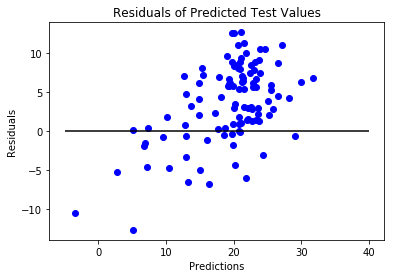

In [7]:
%pylab inline
plt.scatter(result2_y_pred, result2_y_pred-y_test, color='blue')
plt.hlines(y=0, xmin = -5, xmax = 40)
xlabel('Predictions')
ylabel('Residuals')
title('Residuals of Predicted Test Values')
legend(numpoints = 1, loc='best')
plt.show()

The MLR model above showing the residuals of the predicted test values is not reasonable. We see a slight positive trend as we move right on the x-axis for each prediction. This indicates that there are still some signals and/or noise that we have not accounted for. The MLR model would be valid if there is no identifiable trend.

### Part (e)


In [8]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = np.concatenate((X, np.square(X)), axis=1)

In [9]:
X_train2 = X[:400]
X_test2 = X[400:]

y_train2 = y[:400]
y_test2 = y[400:]

reg3 = linear_model.LinearRegression()
result3 = reg3.fit(X_train2, y_train2)

result3_y_train_pred = result3.predict(X_train2)
result3_y_pred = reg3.predict(X_test2)
print("(In sample) Mean squared error is: %.2f" % mean_squared_error(y_train,result3_y_train_pred))
print("(Out of sample) Mean squared error: %.2f" % mean_squared_error(y_test2, result3_y_pred))

(In sample) Mean squared error is: 14.47
(Out of sample) Mean squared error: 32.95


- Running the above code again from Part (c) for the concatenated data, we see that MSE decreases to 32.95.

# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

scale_X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(scale_X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



### Part (1) - Running Ridge and Lasso to find the best lambda

/Users/timothylai/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best alpha:  {'alpha': 0.015269277544167062}
Best score:  -15.8087637474


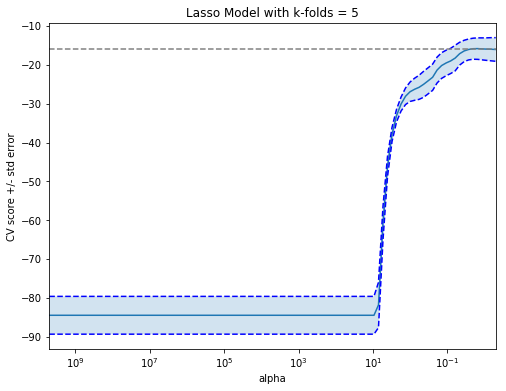

In [11]:
import numpy as np

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=20)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True, scoring = 'neg_mean_squared_error')
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Lasso Model with k-folds = 5')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

print "Best alpha: ", clf.best_params_
print "Best score: ", clf.best_score_

Best alpha:  {'alpha': 0.3289666123287841}
Best score:  -15.9352790776


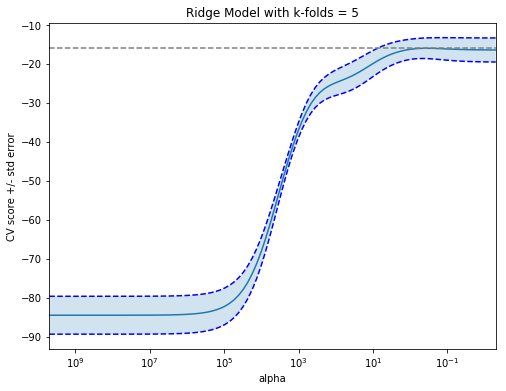

In [12]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=20)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

crf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=True, scoring = 'neg_mean_squared_error')
crf.fit(X_train, y_train)
scores = crf.cv_results_['mean_test_score']
scores_std = crf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Ridge Model with k-folds = 5')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

print "Best alpha: ", crf.best_params_
print "Best score: ", crf.best_score_

### Part (2) - Running Lasso and Ridge to find coefficients with each model

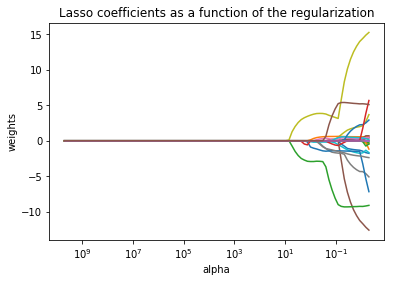

In [13]:
n_alphas = 100

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

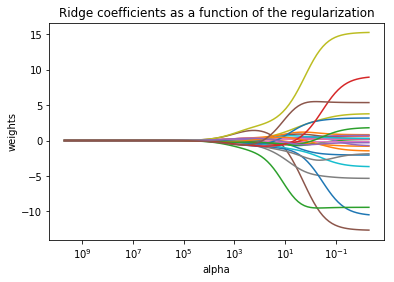

In [14]:
n_alphas = 100

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

- Some observations from the above plots:
     - We see that for both lasso and ridge plots, coefficient weights approach zero as we increase in value of alpha. Each different colored line in the plot represents a different coefficient - in this case, none of the coefficients are zero. This makes intuitive sense, as we would simply have ordinary least squares (linear) regression if alpha was equal to zero. Finally, ridge regression does not zero out any coefficients.
     - For both lasso and ridge plots, we can see that the different coefficients vary in magnitude of weight. Lasso and ridge provide slighty different results.
     - Lastly the independent variables were normalized to avoid any skews when assessing models. The data is normalized to avoid unit discrepancies and puts them on the same scale. For example some of the independent variables are measured in distance, number of rooms, ratios, etc. 

### Part (3) - Running the linear regression, lasso, and ridge on the training data.

#### First, running linear regression:

In [15]:
reg = linear_model.LinearRegression()
result = reg.fit(X_train, y_train)

result_y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, result_y_pred))

Mean squared error: 17.30


#### Next, running lasso:

In [16]:
best_alpha_lasso = clf.fit(X_train, y_train).best_estimator_.alpha
lasso = Lasso(random_state = 20, alpha = best_alpha_lasso)
lasso_fit = lasso.fit(X_train, y_train)

lasso_y_pred = lasso_fit.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, lasso_y_pred))

Mean squared error: 18.62


#### Finally, running ridge regression:

In [17]:
best_alpha_ridge = crf.fit(X_train, y_train).best_estimator_.alpha
ridge = Ridge(random_state = 20, alpha = best_alpha_ridge)
ridge_fit = ridge.fit(X_train, y_train)

ridge_y_pred = ridge_fit.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, ridge_y_pred))

Mean squared error: 17.64


- As we can see from above, linear regression gives us the smallest MSE value of 17.30.
- Ridge regression provides a slightly larger MSE value of 17.64.
- Finally, lasso provides an MSE of 18.62.

### Part (4) - Lasso Cross Validation

In [19]:
clf = LassoCV(alphas=None, cv=10, max_iter=10000)
clf.fit(X_train, y_train)
best_alpha = clf.alpha_
print "The best lambda value is: ", best_alpha
print "\n"
lasso2 = Lasso(random_state = 20, alpha = best_alpha)
lasso2_fit = lasso2.fit(X_train, y_train)
print "The list of coefficients is as follows: \n", lasso2_fit.coef_
print "\n"
lasso2_y_pred = lasso2_fit.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, lasso2_y_pred))

The best lambda value is:  0.0166192714263


The list of coefficients is as follows: 
[ -1.28269414  -0.           0.           0.07510611  -0.         -10.33316024
   0.          -3.99903952   1.88650483  -1.66169854  -1.48521506
   0.56354686  -9.28237824  -0.           0.14586633   0.32056762
   0.30962376  -2.08756368  13.1044735    0.45234393   1.94366783   0.          -0.
   0.          -0.           5.24690488]


Mean squared error: 18.67


- From the above lasso model, we can see that several (9 of 26) coefficients have been zeroed out. Lasso is a shrinkage method which eliminates coefficients that are deemed insignificant and uncorrelated. We also see that the MSE is very similar than before: now it is 18.67 versus the initial value above of 18.62. This tells us that we have similar accuracy in running the model with the updated "best lambda value"., but now considering interaction terms.

# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer



#### Below are two situations where a simpler model would be preferred to a more powerful model:

- Simple models allow for interpretabillity instead of the diffculty of explaining more confusing complex models. 
- Some examples lack training data thus in these situations a simple model would be preferred. The simpler model could potentially be more accurate in terms of fitting the data, since there are limitations with the training data.